In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df= pd.read_csv('/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df['Performance Index'] = df['Performance Index'].astype(int)
df['Extracurricular Activities']= df['Extracurricular Activities'].astype(str)
df['Hours Studied'] = df['Hours Studied'].astype(int)

df.duplicated().sum()

np.int64(127)

In [ ]:
df['Extracurricular Activities']= df['Extracurricular Activities'].replace({'Yes':1, 'No':0})
df


/tmp/ipython-input-1106018250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities']= df['Extracurricular Activities'].replace({'Yes':1, 'No':0})


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [ ]:
df= df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9873 non-null   int64
 1   Previous Scores                   9873 non-null   int64
 2   Extracurricular Activities        9873 non-null   int64
 3   Sleep Hours                       9873 non-null   int64
 4   Sample Question Papers Practiced  9873 non-null   int64
 5   Performance Index                 9873 non-null   int64
dtypes: int64(6)
memory usage: 539.9 KB


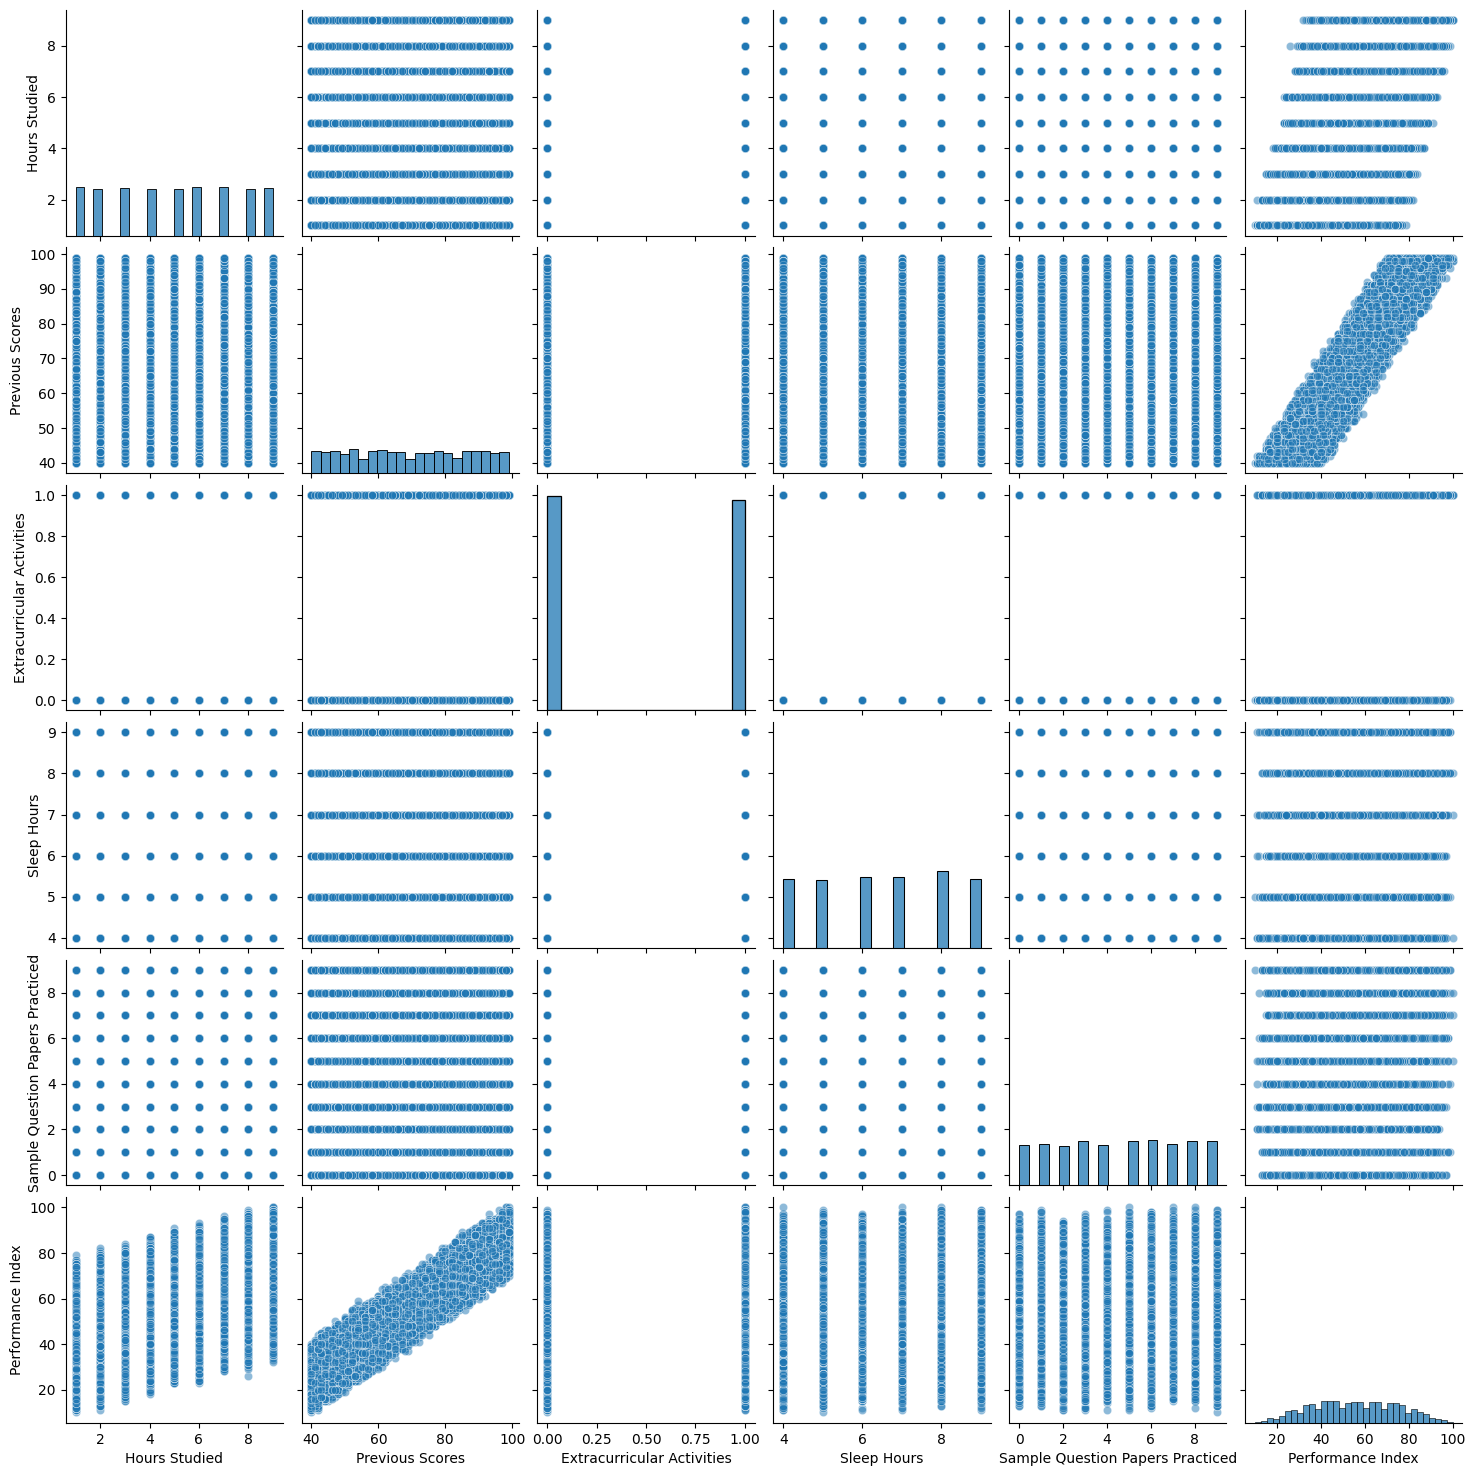

In [ ]:
sns.pairplot(df, kind='scatter',plot_kws={'alpha':0.5})

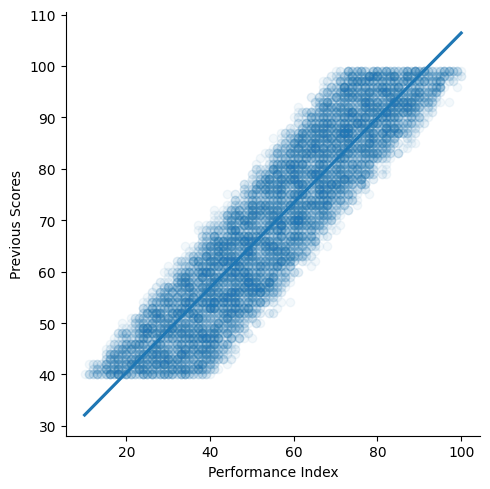

In [ ]:
sns.lmplot(x='Performance Index', y='Previous Scores', data=df, scatter_kws={'alpha':0.05})

In [ ]:
x= ['Hours Studied', 'Previous Scores', 'Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities']
y=['Performance Index']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(df[x])
print(x_scaled)

[[ 0.77556551  1.7061685   1.45402483 -1.24971491  1.01007813]
 [-0.38320542  0.72491187 -1.49131517 -0.90092522 -0.99002243]
 [ 1.16182248 -1.06443844  0.27588883 -0.90092522  1.01007813]
 ...
 [ 0.38930853  0.78263285  0.86495683  0.14544385  1.01007813]
 [ 1.54807946  1.59072654  0.27588883 -1.59850461  1.01007813]
 [ 0.77556551  0.26314405  0.86495683 -1.24971491 -0.99002243]]


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, df[y], test_size=0.3, random_state=40)

In [ ]:
x_train

array([[ 0.00305156,  1.1866797 ,  0.86495683,  1.54060262, -0.99002243],
       [-1.54197634,  1.47528459, -0.90224717,  1.19181293,  1.01007813],
       [ 0.38930853, -0.54494964,  0.27588883,  0.49423355,  1.01007813],
       ...,
       [ 0.38930853,  1.12895872, -1.49131517,  0.14544385,  1.01007813],
       [ 0.77556551,  0.55174894,  0.27588883,  0.14544385, -0.99002243],
       [ 1.54807946, -0.54494964, -1.49131517,  0.14544385, -0.99002243]])

In [ ]:
y_train

,Performance Index
3422,77
4157,74
7238,45
1454,69
2310,71
...,...
7916,86
3619,77
5998,80
5460,72


In [ ]:
x_test

array([[ 1.54807946, -0.14090279, -0.90224717,  0.84302324,  1.01007813],
       [-0.76946239, -0.14090279, -0.31317917, -1.59850461,  1.01007813],
       [ 0.77556551,  0.20542307, -0.90224717,  1.54060262,  1.01007813],
       ...,
       [ 0.38930853, -1.6993692 ,  0.86495683, -1.59850461,  1.01007813],
       [-0.76946239, -0.14090279, -0.90224717,  1.54060262,  1.01007813],
       [-0.76946239, -0.08318182, -0.31317917,  0.49423355, -0.99002243]])

In [ ]:
y_test

,Performance Index
3829,64
4997,48
8596,64
747,41
4120,51
...,...
1140,70
1206,27
8231,29
3244,49


In [ ]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[[ 7.39490546 17.64576766  0.81698399  0.57024043  0.30921165]]
[55.23390283]


In [ ]:
cdf= pd.DataFrame(lm.coef_.T , x , columns=['Coeff'] )
print(cdf)

                                      Coeff
Hours Studied                      7.394905
Previous Scores                   17.645768
Sleep Hours                        0.816984
Sample Question Papers Practiced   0.570240
Extracurricular Activities         0.309212


In [ ]:
predictions= lm.predict(x_test)

In [ ]:
y_test

,Performance Index
3829,64
4997,48
8596,64
747,41
4120,51
...,...
1140,70
1206,27
8231,29
3244,49


In [ ]:
predictions.mean()

np.float64(54.914018456688964)

In [ ]:
y_test.mean()

,0
Performance Index,54.856516


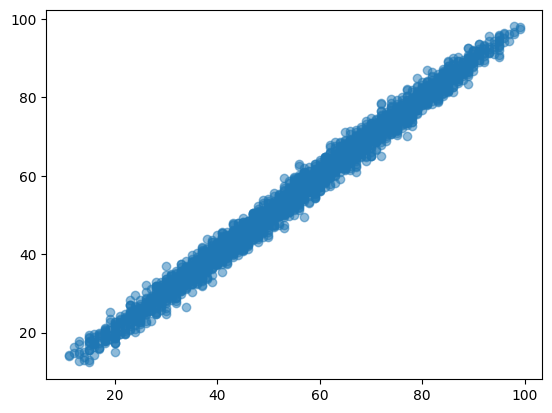

In [ ]:
x = y_test
y = predictions

plt.scatter(x,y, alpha=0.5)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))


1.649945616031866
4.282440965331338


In [ ]:
residuals= y_test-predictions
residuals

,Performance Index
3829,-0.251398
4997,1.797603
8596,-1.047705
747,-3.392516
4120,-0.703384
...,...
1140,1.010144
1206,4.019600
8231,0.766420
3244,1.488816


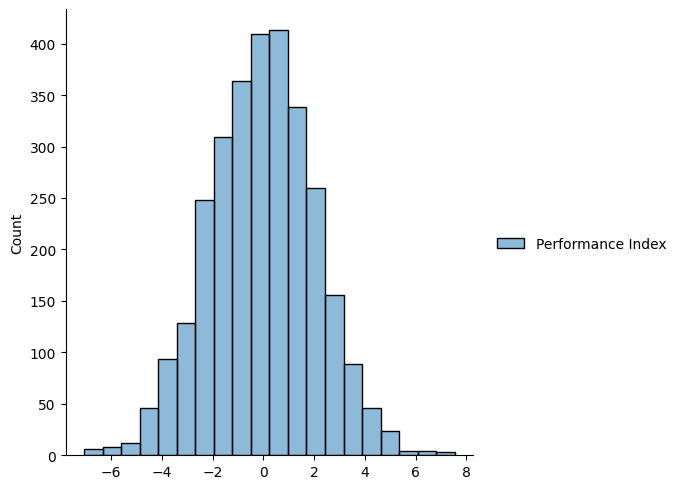

In [ ]:
sns.displot(residuals, bins=20)